Check that the results produced by optimized nGIST match the original nGIST branch

In [1]:
from astropy.io import fits
import h5py
import numpy as np
import matplotlib.pyplot as plt

In [2]:
results_dir = "/Users/thbrown/mauve/bin/gist-geckos-supplementary/gistTutorial/results"
main_project = 'NGC0000_main'
optimize_project = 'NGC0000'

# prepare spectra

In [3]:

binspecf_main = results_dir+"/"+main_project+"/"+main_project+"_BinSpectra.fits"
spec_main = fits.getdata(binspecf_main)['SPEC']
espec_main = fits.getdata(binspecf_main)['ESPEC']
loglam_main = fits.getdata(binspecf_main, ext=2)['LOGLAM']

binspecf_optimize = results_dir+"/"+optimize_project+"/"+optimize_project+"_BinSpectra.hdf5"
with h5py.File(binspecf_optimize, 'r') as hf:
    spec_optimize = hf['SPEC'][:].T
    espec_optimize = hf['ESPEC'][:].T
    loglam_optimize = hf['LOGLAM'][:]

spec_main shape: (10, 2940)
spec_optimize shape: (10, 2940)
Max difference: 0.0
Min difference: 0.0
Mean difference: 0.0
Stddev difference: 0.0
Binned spectra are identical!


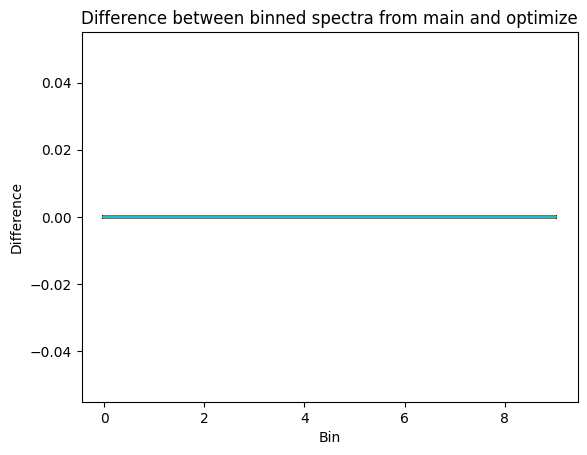

espec_main shape: (10, 2940)
espec_optimize shape: (10, 2940)
Max espec difference: 0.0
Min espec difference: 0.0
espec tables are identical!
loglam_main shape: (2940,)
loglam_optimize shape: (2940,)
Max loglam difference: 0.0
Min loglam difference: 0.0
loglam tables are identical!


In [4]:
# Inspect the shapes and sizes of the two spectra tables
print(f"spec_main shape: {spec_main.shape}")
print(f"spec_optimize shape: {spec_optimize.shape}")

# Check if the two spectra tables have the same shape
if spec_main.shape != spec_optimize.shape:
    print("Warning: spectra have different shapes!")

# Calculate the difference between the two spectra tables
diff = np.abs(spec_main - spec_optimize)

# Print the maximum and minimum differences
print(f"Max difference: {np.max(diff)}")
print(f"Min difference: {np.min(diff)}")

# Print the mean and standard deviation of the differences
print(f"Mean difference: {np.mean(diff)}")
print(f"Stddev difference: {np.std(diff)}")

# Check if the two spectra tables are identical
if np.allclose(spec_main, spec_optimize):
    print("Binned spectra are identical!")
else:
    print("Binned spectra are different!")

# Plot the differences (optional)
plt.plot(diff)
plt.xlabel("Bin")
plt.ylabel("Difference")
plt.title("Difference between binned spectra from main and optimize")
plt.show()

# Check espec and loglam variables too
print(f"espec_main shape: {espec_main.shape}")
print(f"espec_optimize shape: {espec_optimize.shape}")

# Check if the two espec tables have the same shape
if espec_main.shape != espec_optimize.shape:
    print("Warning: espec tables have different shapes!")

# Calculate the difference between the two espec tables
diff_espec = np.abs(espec_main - espec_optimize)

# Print the maximum and minimum differences for espec
print(f"Max espec difference: {np.max(diff_espec)}")
print(f"Min espec difference: {np.min(diff_espec)}")

# Check if the two espec tables are identical
if np.allclose(espec_main, espec_optimize):
    print("espec tables are identical!")
else:
    print("espec tables are different!")

# Check loglam variables too
print(f"loglam_main shape: {loglam_main.shape}")
print(f"loglam_optimize shape: {loglam_optimize.shape}")

# Check if the two loglam tables have the same shape
if loglam_main.shape != loglam_optimize.shape:
    print("Warning: loglam tables have different shapes!")

# Calculate the difference between the two loglam tables
diff_loglam = np.abs(loglam_main - loglam_optimize)

# Print the maximum and minimum differences for loglam
print(f"Max loglam difference: {np.max(diff_loglam)}")
print(f"Min loglam difference: {np.min(diff_loglam)}")

# Check if the two loglam tables are identical
if np.allclose(loglam_main, loglam_optimize):
    print("loglam tables are identical!")
else:
    print("loglam tables are different!")

# Stellar Kinematics

In [5]:
kin_main = fits.open(results_dir+"/"+main_project+"/"+main_project+"_kin.fits")
kin_optimize = fits.open(results_dir+"/"+optimize_project+"/"+optimize_project+"_kin.fits")
extnames = list(kin_main[1].data.dtype.names)

for extname in extnames:
    data_main = kin_main[1].data[extname]
    data_optimize = kin_optimize[1].data[extname]

    # Print the shapes of the two data arrays
    print(f"{extname} shape (main):", data_main.shape)
    print(f"{extname} shape (optimize):", data_optimize.shape)

    # Check if the two data arrays have the same shape
    if data_main.shape != data_optimize.shape:
        print(f"Warning: {extname} has different shapes!")

    # Calculate the difference between the two data arrays
    diff = np.abs(data_main - data_optimize)

    # Print the maximum and minimum differences
    print(f"Max difference ({extname}):", np.nanmax(diff))
    print(f"Min difference ({extname}):", np.nanmin(diff))

    # Print the mean and standard deviation of the differences
    print(f"Mean difference ({extname}):", np.nanmean(diff))
    print(f"Stddev difference ({extname}):", np.nanstd(diff))

    # Check if the two data arrays are identical
    if np.allclose(data_main, data_optimize, equal_nan=True):
        print(f"{extname} is identical!")
        print("")
    else:
        print(f"{extname} is different!")

        # Plot the differences
        fig, axs = plt.subplots(2, figsize=(4, 3))
        axs[0].plot(diff)
        axs[0].set_xlabel("Bin")
        axs[0].set_ylabel("Abs Diff")
        axs[0].set_title(f"Absolute difference of {extname} (main - optimize)")

        # Calculate the fractional error
        fractional_error = diff / np.abs(data_main)
        axs[1].plot(fractional_error)
        axs[1].set_xlabel("Bin")
        axs[1].set_ylabel("Frac Diff")
        axs[1].set_title(f"Fractional difference of {extname} optimize from main")

        plt.tight_layout(pad=0.5)
        plt.show()

        print("")

V shape (main): (10,)
V shape (optimize): (10,)
Max difference (V): 0.0
Min difference (V): 0.0
Mean difference (V): 0.0
Stddev difference (V): 0.0
V is identical!

SIGMA shape (main): (10,)
SIGMA shape (optimize): (10,)
Max difference (SIGMA): 0.0
Min difference (SIGMA): 0.0
Mean difference (SIGMA): 0.0
Stddev difference (SIGMA): 0.0
SIGMA is identical!

H3 shape (main): (10,)
H3 shape (optimize): (10,)
Max difference (H3): 0.0
Min difference (H3): 0.0
Mean difference (H3): 0.0
Stddev difference (H3): 0.0
H3 is identical!

H4 shape (main): (10,)
H4 shape (optimize): (10,)
Max difference (H4): 0.0
Min difference (H4): 0.0
Mean difference (H4): 0.0
Stddev difference (H4): 0.0
H4 is identical!

FORM_ERR_V shape (main): (10,)
FORM_ERR_V shape (optimize): (10,)
Max difference (FORM_ERR_V): 0.0
Min difference (FORM_ERR_V): 0.0
Mean difference (FORM_ERR_V): 0.0
Stddev difference (FORM_ERR_V): 0.0
FORM_ERR_V is identical!

FORM_ERR_SIGMA shape (main): (10,)
FORM_ERR_SIGMA shape (optimize): (1

# Continuum

/Users/thbrown/bin/mambaforge/lib/python3.9/site-packages/astropy/units/quantity.py:611: RuntimeWarning: invalid value encountered in divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


Max difference: 0.0 1e-20 erg / (Angstrom cm2 s)
Min difference: 0.0 1e-20 erg / (Angstrom cm2 s)
Mean difference: 0.0 1e-20 erg / (Angstrom cm2 s)
Stddev difference: 0.0 1e-20 erg / (Angstrom cm2 s)
Cubes are identical!


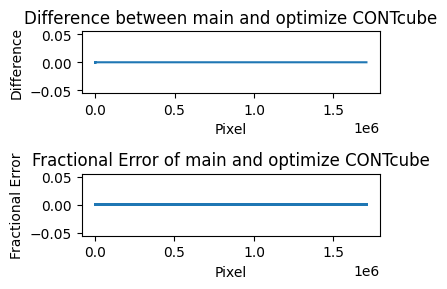

In [6]:
from spectral_cube import SpectralCube

contcube_main = results_dir+"/"+main_project+"/"+main_project+"_CONTcube.fits"
contcube_optimize = results_dir+"/"+optimize_project+"/"+optimize_project+"_CONTcube.fits"

cube_main = SpectralCube.read(contcube_main)
cube_optimize = SpectralCube.read(contcube_optimize)

# Check if the two cubes have the same shape
if cube_main.shape != cube_optimize.shape:
    print("Warning: Cubes have different shapes!")

# Calculate the difference between the two cubes
diff = np.abs(cube_main.filled_data[:] - cube_optimize.filled_data[:])

# Print the maximum and minimum differences
print("Max difference:", np.nanmax(diff))
print("Min difference:", np.nanmin(diff))

# Print the mean and standard deviation of the differences
print("Mean difference:", np.nanmean(diff))
print("Stddev difference:", np.nanstd(diff))

# Check if the two cubes are identical
if np.allclose(cube_main.filled_data[:], cube_optimize.filled_data[:], equal_nan=True):
    print("Cubes are identical!")
else:
    print("Cubes are different!")

# Plot the differences
fig, axs = plt.subplots(2, figsize=(4, 3))
axs[0].plot(diff.flatten())
axs[0].set_xlabel("Pixel")
axs[0].set_ylabel("Difference")
axs[0].set_title("Difference between main and optimize CONTcube")

# Calculate the fractional error
fractional_error = diff / np.abs(cube_main.filled_data[:])
axs[1].plot(fractional_error.flatten())
axs[1].set_xlabel("Pixel")
axs[1].set_ylabel("Fractional Error")
axs[1].set_title("Fractional Error of main and optimize CONTcube")

plt.tight_layout()
plt.show()

# Emission Lines

In [7]:
gas_main = fits.open(results_dir+"/"+main_project+"/"+main_project+"_gas_BIN.fits")
gas_optimize = fits.open(results_dir+"/"+optimize_project+"/"+optimize_project+"_gas_BIN.fits")
extnames = list(gas_main[1].data.dtype.names)

for extname in extnames:
    data_main = gas_main[1].data[extname]
    data_optimize = gas_optimize[1].data[extname]

    # Print the shapes of the two data arrays
    print(f"{extname} shape (main):", data_main.shape)
    print(f"{extname} shape (optimize):", data_optimize.shape)

    # Check if the two data arrays have the same shape
    if data_main.shape != data_optimize.shape:
        print(f"Warning: {extname} has different shapes!")

    # Calculate the difference between the two data arrays
    diff = np.abs(data_main - data_optimize)

    # Print the maximum and minimum differences
    print(f"Max difference ({extname}):", np.nanmax(diff))
    print(f"Min difference ({extname}):", np.nanmin(diff))

    # Print the mean and standard deviation of the differences
    print(f"Mean difference ({extname}):", np.nanmean(diff))
    print(f"Stddev difference ({extname}):", np.nanstd(diff))

    # Check if the two data arrays are identical
    if np.allclose(data_main, data_optimize, equal_nan=True):
        print(f"{extname} is identical!")
        print("")
    else:
        print(f"{extname} is different!")

        # Plot the differences
        fig, axs = plt.subplots(2, figsize=(4, 3))
        axs[0].plot(diff)
        axs[0].set_xlabel("Bin")
        axs[0].set_ylabel("Abs Diff")
        axs[0].set_title(f"Absolute difference of {extname} (main - optimize)")

        # Calculate the fractional error
        fractional_error = diff / np.abs(data_main)
        axs[1].plot(fractional_error)
        axs[1].set_xlabel("Bin")
        axs[1].set_ylabel("Frac Diff")
        axs[1].set_title(f"Fractional difference of {extname} optimize from main")

        plt.tight_layout(pad=0.5)
        plt.show()

        print("")

BIN_ID shape (main): (10,)
BIN_ID shape (optimize): (10,)
Max difference (BIN_ID): 0
Min difference (BIN_ID): 0
Mean difference (BIN_ID): 0.0
Stddev difference (BIN_ID): 0.0
BIN_ID is identical!

V_STARS2 shape (main): (10,)
V_STARS2 shape (optimize): (10,)
Max difference (V_STARS2): 0.0
Min difference (V_STARS2): 0.0
Mean difference (V_STARS2): 0.0
Stddev difference (V_STARS2): 0.0
V_STARS2 is identical!

SIGMA_STARS2 shape (main): (10,)
SIGMA_STARS2 shape (optimize): (10,)
Max difference (SIGMA_STARS2): 0.0
Min difference (SIGMA_STARS2): 0.0
Mean difference (SIGMA_STARS2): 0.0
Stddev difference (SIGMA_STARS2): 0.0
SIGMA_STARS2 is identical!

CHI2_TOT shape (main): (10,)
CHI2_TOT shape (optimize): (10,)
Max difference (CHI2_TOT): 0.0
Min difference (CHI2_TOT): 0.0
Mean difference (CHI2_TOT): 0.0
Stddev difference (CHI2_TOT): 0.0
CHI2_TOT is identical!

Hb4861_FLUX shape (main): (10,)
Hb4861_FLUX shape (optimize): (10,)
Max difference (Hb4861_FLUX): 0.0
Min difference (Hb4861_FLUX): 0.

# Star Formation Histories  

AGE shape (main): (10,)
AGE shape (optimize): (10,)
Max difference (AGE): 0.04720327491945042
Min difference (AGE): 0.0009237864456004274
Mean difference (AGE): 0.019613823165801847
Stddev difference (AGE): 0.014255634695825027
AGE is different!


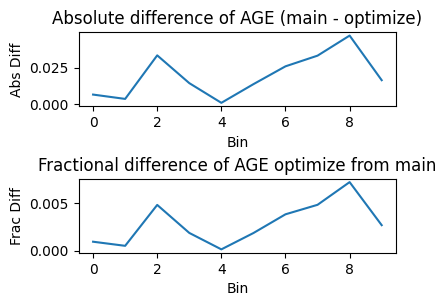


METAL shape (main): (10,)
METAL shape (optimize): (10,)
Max difference (METAL): 0.0025726802400480794
Min difference (METAL): 6.570725243529307e-05
Mean difference (METAL): 0.0011241719574152994
Stddev difference (METAL): 0.0007664681761328126
METAL is different!


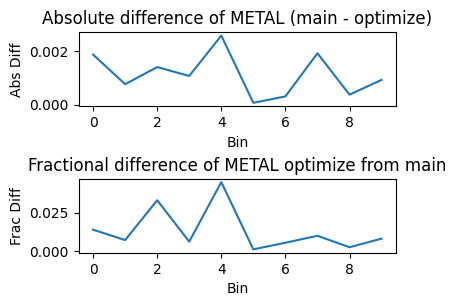


ALPHA shape (main): (10,)
ALPHA shape (optimize): (10,)
Max difference (ALPHA): 0.0
Min difference (ALPHA): 0.0
Mean difference (ALPHA): 0.0
Stddev difference (ALPHA): 0.0
ALPHA is identical!

SNR_POSTFIT shape (main): (10,)
SNR_POSTFIT shape (optimize): (10,)
Max difference (SNR_POSTFIT): 0.22346098127812297
Min difference (SNR_POSTFIT): 0.017205623280460713
Mean difference (SNR_POSTFIT): 0.07347056348836248
Stddev difference (SNR_POSTFIT): 0.05927972911677382
SNR_POSTFIT is different!


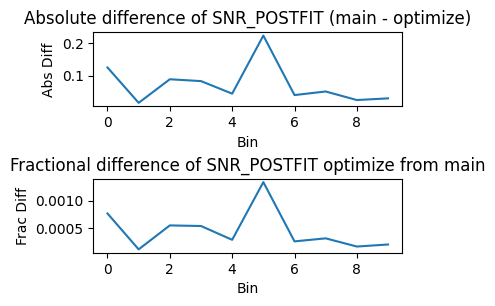


EBV shape (main): (10,)
EBV shape (optimize): (10,)
Max difference (EBV): 0.0
Min difference (EBV): 0.0
Mean difference (EBV): 0.0
Stddev difference (EBV): 0.0
EBV is identical!



In [8]:
sfh_main = fits.open(results_dir+"/"+main_project+"/"+main_project+"_sfh.fits")
sfh_optimize = fits.open(results_dir+"/"+optimize_project+"/"+optimize_project+"_sfh.fits")
extnames = list(sfh_main[1].data.dtype.names)

for extname in extnames:
    data_main = sfh_main[1].data[extname]
    data_optimize = sfh_optimize[1].data[extname]

    # Print the shapes of the two data arrays
    print(f"{extname} shape (main):", data_main.shape)
    print(f"{extname} shape (optimize):", data_optimize.shape)

    # Check if the two data arrays have the same shape
    if data_main.shape != data_optimize.shape:
        print(f"Warning: {extname} has different shapes!")

    # Calculate the difference between the two data arrays
    diff = np.abs(data_main - data_optimize)

    # Print the maximum and minimum differences
    print(f"Max difference ({extname}):", np.nanmax(diff))
    print(f"Min difference ({extname}):", np.nanmin(diff))

    # Print the mean and standard deviation of the differences
    print(f"Mean difference ({extname}):", np.nanmean(diff))
    print(f"Stddev difference ({extname}):", np.nanstd(diff))

    # Check if the two data arrays are identical
    if np.allclose(data_main, data_optimize, equal_nan=True):
        print(f"{extname} is identical!")
        print("")
    else:
        print(f"{extname} is different!")

        # Plot the differences
        fig, axs = plt.subplots(2, figsize=(4, 3))
        axs[0].plot(diff)
        axs[0].set_xlabel("Bin")
        axs[0].set_ylabel("Abs Diff")
        axs[0].set_title(f"Absolute difference of {extname} (main - optimize)")

        # Calculate the fractional error
        fractional_error = diff / np.abs(data_main)
        axs[1].plot(fractional_error)
        axs[1].set_xlabel("Bin")
        axs[1].set_ylabel("Frac Diff")
        axs[1].set_title(f"Fractional difference of {extname} optimize from main")

        plt.tight_layout(pad=0.5)
        plt.show()
        print("")

# Line Strengths

Hbeta_o shape (main): (10,)
Hbeta_o shape (optimize): (10,)
Max difference (Hbeta_o): 0.0
Min difference (Hbeta_o): 0.0
Mean difference (Hbeta_o): 0.0
Stddev difference (Hbeta_o): 0.0
Hbeta_o is identical!

ERR_Hbeta_o shape (main): (10,)
ERR_Hbeta_o shape (optimize): (10,)
Max difference (ERR_Hbeta_o): 0.00048160506548704696
Min difference (ERR_Hbeta_o): 1.3293529669906835e-05
Mean difference (ERR_Hbeta_o): 0.00020048999934288761
Stddev difference (ERR_Hbeta_o): 0.0001407091183830244
ERR_Hbeta_o is different!


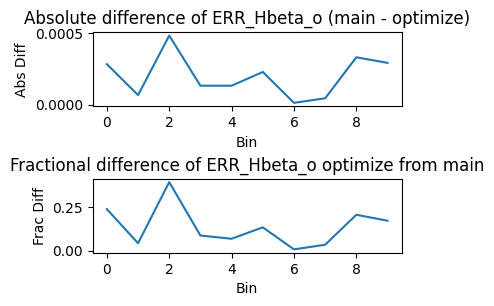


Hbeta shape (main): (10,)
Hbeta shape (optimize): (10,)
Max difference (Hbeta): 0.0
Min difference (Hbeta): 0.0
Mean difference (Hbeta): 0.0
Stddev difference (Hbeta): 0.0
Hbeta is identical!

ERR_Hbeta shape (main): (10,)
ERR_Hbeta shape (optimize): (10,)
Max difference (ERR_Hbeta): 0.0002887303855439046
Min difference (ERR_Hbeta): 1.6432098275507125e-05
Mean difference (ERR_Hbeta): 0.00013363528965273355
Stddev difference (ERR_Hbeta): 8.555343208903321e-05
ERR_Hbeta is different!


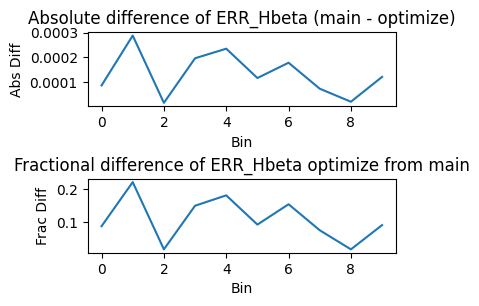


Fe4920 shape (main): (10,)
Fe4920 shape (optimize): (10,)
Max difference (Fe4920): 0.0
Min difference (Fe4920): 0.0
Mean difference (Fe4920): 0.0
Stddev difference (Fe4920): 0.0
Fe4920 is identical!

ERR_Fe4920 shape (main): (10,)
ERR_Fe4920 shape (optimize): (10,)
Max difference (ERR_Fe4920): 0.0003185024865293661
Min difference (ERR_Fe4920): 4.639220278095254e-05
Mean difference (ERR_Fe4920): 0.00014157761891039571
Stddev difference (ERR_Fe4920): 8.66109252210747e-05
ERR_Fe4920 is different!


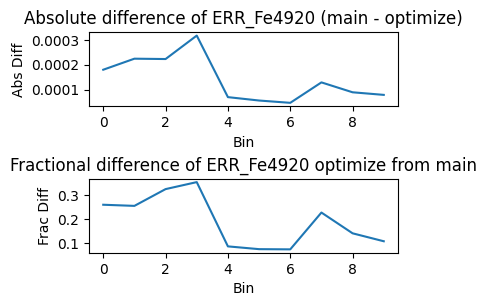


Fe5015 shape (main): (10,)
Fe5015 shape (optimize): (10,)
Max difference (Fe5015): 0.0
Min difference (Fe5015): 0.0
Mean difference (Fe5015): 0.0
Stddev difference (Fe5015): 0.0
Fe5015 is identical!

ERR_Fe5015 shape (main): (10,)
ERR_Fe5015 shape (optimize): (10,)
Max difference (ERR_Fe5015): 0.0007085681016602567
Min difference (ERR_Fe5015): 8.956036691983721e-05
Mean difference (ERR_Fe5015): 0.00037694443256117133
Stddev difference (ERR_Fe5015): 0.00021707317094198905
ERR_Fe5015 is different!


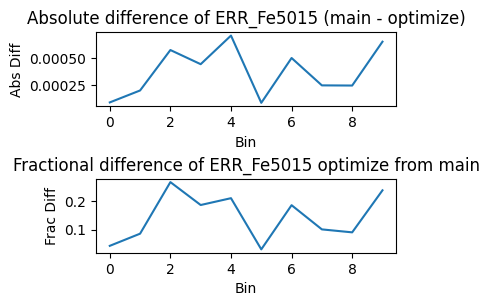


Mg1 shape (main): (10,)
Mg1 shape (optimize): (10,)
Max difference (Mg1): 0.0
Min difference (Mg1): 0.0
Mean difference (Mg1): 0.0
Stddev difference (Mg1): 0.0
Mg1 is identical!

ERR_Mg1 shape (main): (10,)
ERR_Mg1 shape (optimize): (10,)
Max difference (ERR_Mg1): 1.186504877323236e-05
Min difference (ERR_Mg1): 5.138340806934252e-07
Mean difference (ERR_Mg1): 5.7004937972056665e-06
Stddev difference (ERR_Mg1): 4.378281607853335e-06
ERR_Mg1 is different!


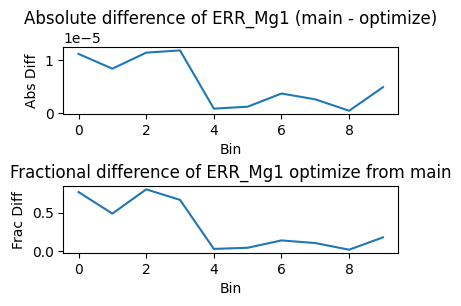


MgH shape (main): (10,)
MgH shape (optimize): (10,)
Max difference (MgH): 0.0
Min difference (MgH): 0.0
Mean difference (MgH): 0.0
Stddev difference (MgH): 0.0
MgH is identical!

ERR_MgH shape (main): (10,)
ERR_MgH shape (optimize): (10,)
Max difference (ERR_MgH): 0.0006780383853870176
Min difference (ERR_MgH): 1.6125728478639037e-05
Mean difference (ERR_MgH): 0.0003602078234727338
Stddev difference (ERR_MgH): 0.0002304676741638934
ERR_MgH is different!


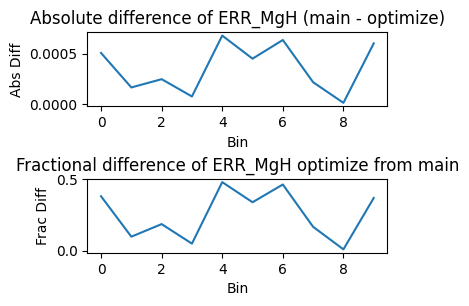


MgG shape (main): (10,)
MgG shape (optimize): (10,)
Max difference (MgG): 0.0
Min difference (MgG): 0.0
Mean difference (MgG): 0.0
Stddev difference (MgG): 0.0
MgG is identical!

ERR_MgG shape (main): (10,)
ERR_MgG shape (optimize): (10,)
Max difference (ERR_MgG): 0.0009755745668692303
Min difference (ERR_MgG): 1.5324484397682275e-05
Mean difference (ERR_MgG): 0.00033027992823556887
Stddev difference (ERR_MgG): 0.0002974637735355221
ERR_MgG is different!


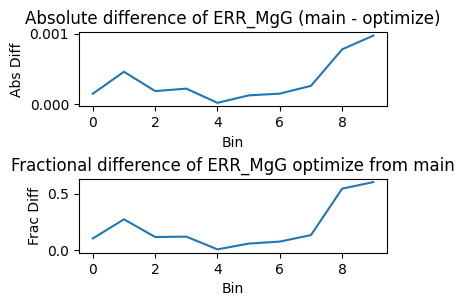


Mg2 shape (main): (10,)
Mg2 shape (optimize): (10,)
Max difference (Mg2): 0.0
Min difference (Mg2): 0.0
Mean difference (Mg2): 0.0
Stddev difference (Mg2): 0.0
Mg2 is identical!

ERR_Mg2 shape (main): (10,)
ERR_Mg2 shape (optimize): (10,)
Max difference (ERR_Mg2): 1.3928046853878548e-05
Min difference (ERR_Mg2): 2.075074294104712e-07
Mean difference (ERR_Mg2): 4.820077180701891e-06
Stddev difference (ERR_Mg2): 3.919991432821989e-06
ERR_Mg2 is different!


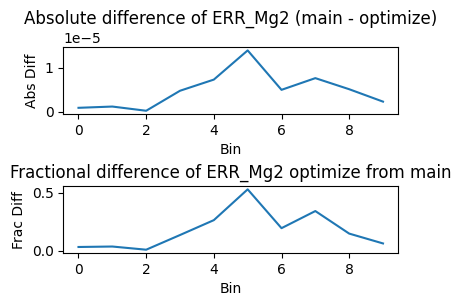


Mgb shape (main): (10,)
Mgb shape (optimize): (10,)
Max difference (Mgb): 0.0
Min difference (Mgb): 0.0
Mean difference (Mgb): 0.0
Stddev difference (Mgb): 0.0
Mgb is identical!

ERR_Mgb shape (main): (10,)
ERR_Mgb shape (optimize): (10,)
Max difference (ERR_Mgb): 0.000539309364128153
Min difference (ERR_Mgb): 1.178860037788455e-05
Mean difference (ERR_Mgb): 0.00021851383452401018
Stddev difference (ERR_Mgb): 0.00016435214715304847
ERR_Mgb is different!


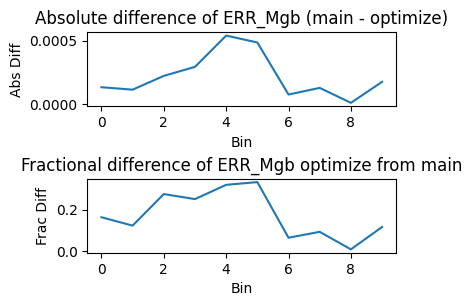


Fe5270 shape (main): (10,)
Fe5270 shape (optimize): (10,)
Max difference (Fe5270): 0.0
Min difference (Fe5270): 0.0
Mean difference (Fe5270): 0.0
Stddev difference (Fe5270): 0.0
Fe5270 is identical!

ERR_Fe5270 shape (main): (10,)
ERR_Fe5270 shape (optimize): (10,)
Max difference (ERR_Fe5270): 0.000513368315719524
Min difference (ERR_Fe5270): 4.3262303590270836e-05
Mean difference (ERR_Fe5270): 0.0002392019949929626
Stddev difference (ERR_Fe5270): 0.00015633264931948668
ERR_Fe5270 is different!


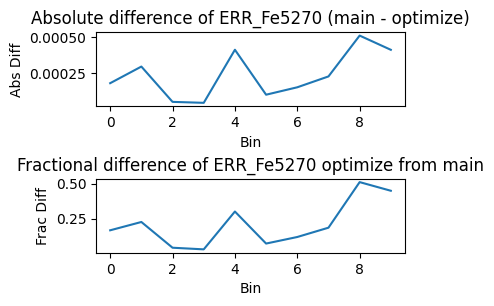


Fe5335 shape (main): (10,)
Fe5335 shape (optimize): (10,)
Max difference (Fe5335): 0.0
Min difference (Fe5335): 0.0
Mean difference (Fe5335): 0.0
Stddev difference (Fe5335): 0.0
Fe5335 is identical!

ERR_Fe5335 shape (main): (10,)
ERR_Fe5335 shape (optimize): (10,)
Max difference (ERR_Fe5335): 0.000850436143479454
Min difference (ERR_Fe5335): 1.350168389861327e-05
Mean difference (ERR_Fe5335): 0.00024424986548751617
Stddev difference (ERR_Fe5335): 0.00025842120863460547
ERR_Fe5335 is different!


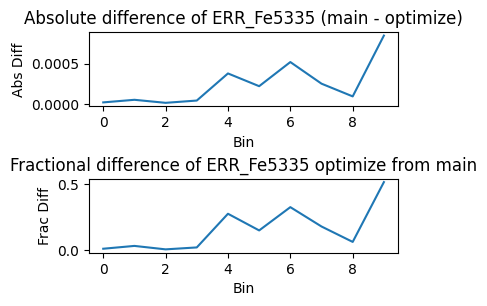


Fe5406 shape (main): (10,)
Fe5406 shape (optimize): (10,)
Max difference (Fe5406): 0.0
Min difference (Fe5406): 0.0
Mean difference (Fe5406): 0.0
Stddev difference (Fe5406): 0.0
Fe5406 is identical!

ERR_Fe5406 shape (main): (10,)
ERR_Fe5406 shape (optimize): (10,)
Max difference (ERR_Fe5406): 0.00041558561839595185
Min difference (ERR_Fe5406): 2.748692336096946e-05
Mean difference (ERR_Fe5406): 0.0001904786828592622
Stddev difference (ERR_Fe5406): 0.00011133581113298922
ERR_Fe5406 is different!


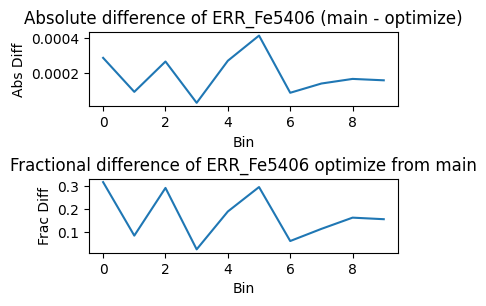


aTiO shape (main): (10,)
aTiO shape (optimize): (10,)
Max difference (aTiO): 0.0
Min difference (aTiO): 0.0
Mean difference (aTiO): 0.0
Stddev difference (aTiO): 0.0
aTiO is identical!

ERR_aTiO shape (main): (10,)
ERR_aTiO shape (optimize): (10,)
Max difference (ERR_aTiO): 9.054469230143285e-06
Min difference (ERR_aTiO): 3.342426218819803e-07
Mean difference (ERR_aTiO): 3.858664240156678e-06
Stddev difference (ERR_aTiO): 2.6189334417449757e-06
ERR_aTiO is different!


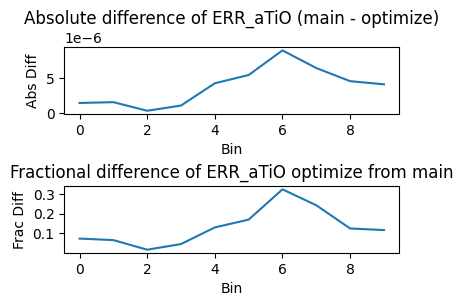


Fe5709 shape (main): (10,)
Fe5709 shape (optimize): (10,)
Max difference (Fe5709): 0.0
Min difference (Fe5709): 0.0
Mean difference (Fe5709): 0.0
Stddev difference (Fe5709): 0.0
Fe5709 is identical!

ERR_Fe5709 shape (main): (10,)
ERR_Fe5709 shape (optimize): (10,)
Max difference (ERR_Fe5709): 0.0003493670089327884
Min difference (ERR_Fe5709): 3.107953181584683e-05
Mean difference (ERR_Fe5709): 0.00018476052155183014
Stddev difference (ERR_Fe5709): 9.716498230508621e-05
ERR_Fe5709 is different!


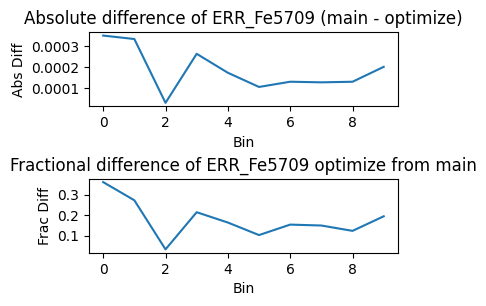


Fe5782 shape (main): (10,)
Fe5782 shape (optimize): (10,)
Max difference (Fe5782): 0.0
Min difference (Fe5782): 0.0
Mean difference (Fe5782): 0.0
Stddev difference (Fe5782): 0.0
Fe5782 is identical!

ERR_Fe5782 shape (main): (10,)
ERR_Fe5782 shape (optimize): (10,)
Max difference (ERR_Fe5782): 0.00016396265255266005
Min difference (ERR_Fe5782): 1.0703303033427489e-05
Mean difference (ERR_Fe5782): 7.925470487640629e-05
Stddev difference (ERR_Fe5782): 5.288347121720871e-05
ERR_Fe5782 is different!


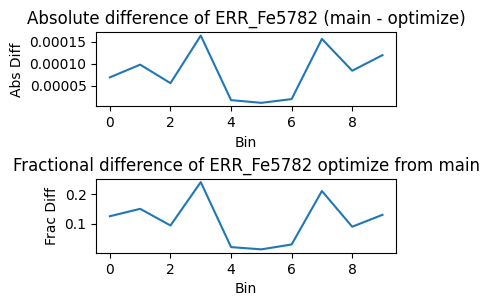


NaD shape (main): (10,)
NaD shape (optimize): (10,)
Max difference (NaD): 0.0
Min difference (NaD): 0.0
Mean difference (NaD): 0.0
Stddev difference (NaD): 0.0
NaD is identical!

ERR_NaD shape (main): (10,)
ERR_NaD shape (optimize): (10,)
Max difference (ERR_NaD): 0.000556562159095098
Min difference (ERR_NaD): 1.58036524652769e-05
Mean difference (ERR_NaD): 0.00023016944292580965
Stddev difference (ERR_NaD): 0.0001693020873007748
ERR_NaD is different!


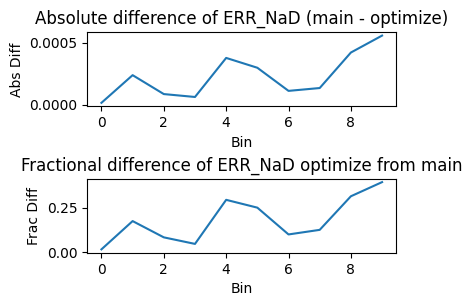


TiO1 shape (main): (10,)
TiO1 shape (optimize): (10,)
Max difference (TiO1): 0.0
Min difference (TiO1): 0.0
Mean difference (TiO1): 0.0
Stddev difference (TiO1): 0.0
TiO1 is identical!

ERR_TiO1 shape (main): (10,)
ERR_TiO1 shape (optimize): (10,)
Max difference (ERR_TiO1): 1.1472121734703685e-05
Min difference (ERR_TiO1): 3.2317589207654884e-07
Mean difference (ERR_TiO1): 6.7662855109435185e-06
Stddev difference (ERR_TiO1): 3.0353494672457915e-06
ERR_TiO1 is different!


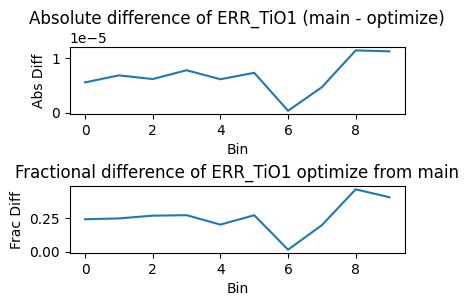


Ca6162 shape (main): (10,)
Ca6162 shape (optimize): (10,)
Max difference (Ca6162): 0.0
Min difference (Ca6162): 0.0
Mean difference (Ca6162): 0.0
Stddev difference (Ca6162): 0.0
Ca6162 is identical!

ERR_Ca6162 shape (main): (10,)
ERR_Ca6162 shape (optimize): (10,)
Max difference (ERR_Ca6162): 0.00022162604602179092
Min difference (ERR_Ca6162): 5.150390684225195e-06
Mean difference (ERR_Ca6162): 9.668436706503043e-05
Stddev difference (ERR_Ca6162): 6.373637434787181e-05
ERR_Ca6162 is different!


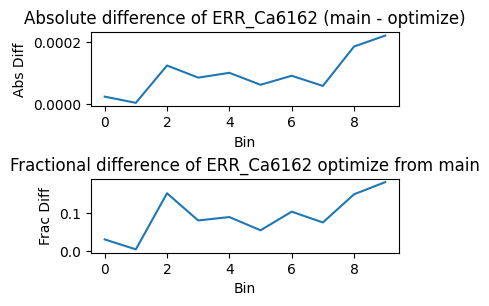


Fe6189 shape (main): (10,)
Fe6189 shape (optimize): (10,)
Max difference (Fe6189): 0.0
Min difference (Fe6189): 0.0
Mean difference (Fe6189): 0.0
Stddev difference (Fe6189): 0.0
Fe6189 is identical!

ERR_Fe6189 shape (main): (10,)
ERR_Fe6189 shape (optimize): (10,)
Max difference (ERR_Fe6189): 0.0003367915612620656
Min difference (ERR_Fe6189): 5.366285529770972e-06
Mean difference (ERR_Fe6189): 0.00011875052903380931
Stddev difference (ERR_Fe6189): 0.00010927784421565102
ERR_Fe6189 is different!


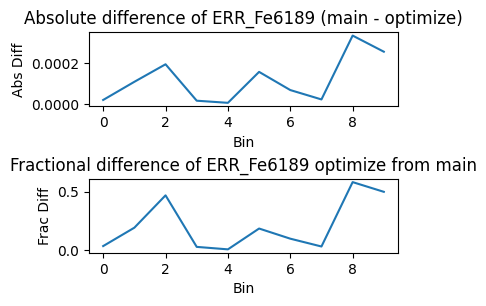


TiO2 shape (main): (10,)
TiO2 shape (optimize): (10,)
Max difference (TiO2): 0.0
Min difference (TiO2): 0.0
Mean difference (TiO2): 0.0
Stddev difference (TiO2): 0.0
TiO2 is identical!

ERR_TiO2 shape (main): (10,)
ERR_TiO2 shape (optimize): (10,)
Max difference (ERR_TiO2): 7.425393486357122e-06
Min difference (ERR_TiO2): 4.3065916910024844e-07
Mean difference (ERR_TiO2): 2.9021919193098946e-06
Stddev difference (ERR_TiO2): 2.3846598347116424e-06
ERR_TiO2 is different!


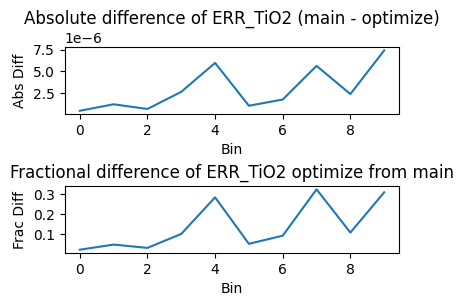


TiO2sdss shape (main): (10,)
TiO2sdss shape (optimize): (10,)
Max difference (TiO2sdss): 0.0
Min difference (TiO2sdss): 0.0
Mean difference (TiO2sdss): 0.0
Stddev difference (TiO2sdss): 0.0
TiO2sdss is identical!

ERR_TiO2sdss shape (main): (10,)
ERR_TiO2sdss shape (optimize): (10,)
Max difference (ERR_TiO2sdss): 6.9079189804424165e-06
Min difference (ERR_TiO2sdss): 1.2443258161597544e-07
Mean difference (ERR_TiO2sdss): 3.3826936324365566e-06
Stddev difference (ERR_TiO2sdss): 2.275085771903156e-06
ERR_TiO2sdss is different!


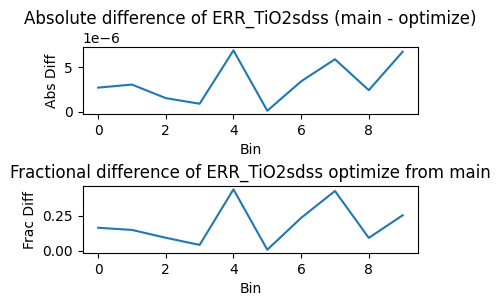


CaH1 shape (main): (10,)
CaH1 shape (optimize): (10,)
Max difference (CaH1): 0.0
Min difference (CaH1): 0.0
Mean difference (CaH1): 0.0
Stddev difference (CaH1): 0.0
CaH1 is identical!

ERR_CaH1 shape (main): (10,)
ERR_CaH1 shape (optimize): (10,)
Max difference (ERR_CaH1): 1.4944528995476646e-05
Min difference (ERR_CaH1): 4.274117230909584e-07
Mean difference (ERR_CaH1): 6.268522609691178e-06
Stddev difference (ERR_CaH1): 4.085641720040354e-06
ERR_CaH1 is different!


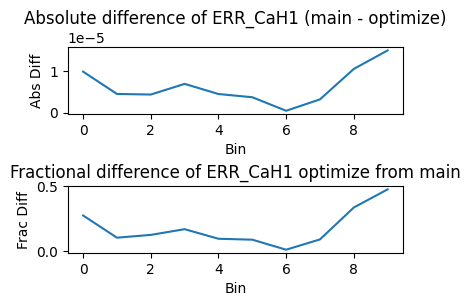


Fe6497 shape (main): (10,)
Fe6497 shape (optimize): (10,)
Max difference (Fe6497): 0.0
Min difference (Fe6497): 0.0
Mean difference (Fe6497): 0.0
Stddev difference (Fe6497): 0.0
Fe6497 is identical!

ERR_Fe6497 shape (main): (10,)
ERR_Fe6497 shape (optimize): (10,)
Max difference (ERR_Fe6497): 0.0004474093037402815
Min difference (ERR_Fe6497): 2.428177308634702e-05
Mean difference (ERR_Fe6497): 0.0001507243060366635
Stddev difference (ERR_Fe6497): 0.0001208516886217423
ERR_Fe6497 is different!


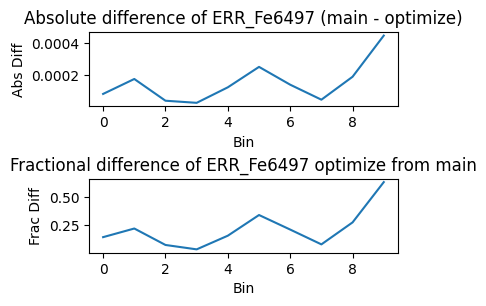


Halpha shape (main): (10,)
Halpha shape (optimize): (10,)
Max difference (Halpha): 0.0
Min difference (Halpha): 0.0
Mean difference (Halpha): 0.0
Stddev difference (Halpha): 0.0
Halpha is identical!

ERR_Halpha shape (main): (10,)
ERR_Halpha shape (optimize): (10,)
Max difference (ERR_Halpha): 0.0002412678952015059
Min difference (ERR_Halpha): 4.492912594150232e-05
Mean difference (ERR_Halpha): 9.701747386520646e-05
Stddev difference (ERR_Halpha): 5.563206104318389e-05
ERR_Halpha is different!


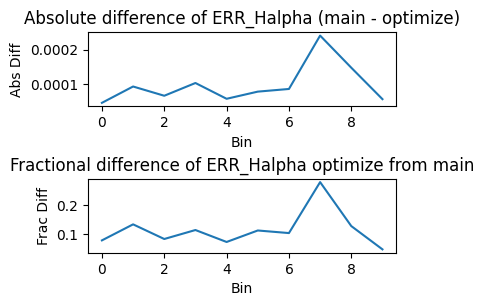


Ha_Gregg94 shape (main): (10,)
Ha_Gregg94 shape (optimize): (10,)
Max difference (Ha_Gregg94): 0.0
Min difference (Ha_Gregg94): 0.0
Mean difference (Ha_Gregg94): 0.0
Stddev difference (Ha_Gregg94): 0.0
Ha_Gregg94 is identical!

ERR_Ha_Gregg94 shape (main): (10,)
ERR_Ha_Gregg94 shape (optimize): (10,)
Max difference (ERR_Ha_Gregg94): 5.98423648852577e-05
Min difference (ERR_Ha_Gregg94): 8.533945389079868e-06
Mean difference (ERR_Ha_Gregg94): 2.623649693577569e-05
Stddev difference (ERR_Ha_Gregg94): 1.6062547371307978e-05
ERR_Ha_Gregg94 is different!


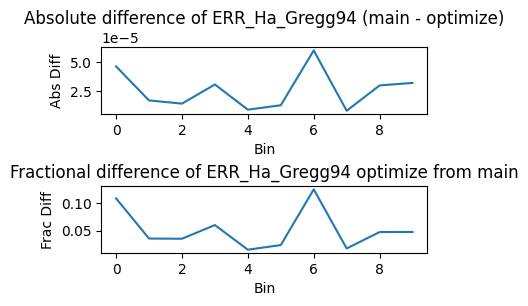


CaH2 shape (main): (10,)
CaH2 shape (optimize): (10,)
Max difference (CaH2): 0.0
Min difference (CaH2): 0.0
Mean difference (CaH2): 0.0
Stddev difference (CaH2): 0.0
CaH2 is identical!

ERR_CaH2 shape (main): (10,)
ERR_CaH2 shape (optimize): (10,)
Max difference (ERR_CaH2): 1.13252804092492e-05
Min difference (ERR_CaH2): 5.004174671663169e-07
Mean difference (ERR_CaH2): 2.9050595027196377e-06
Stddev difference (ERR_CaH2): 3.124825720167949e-06
ERR_CaH2 is different!


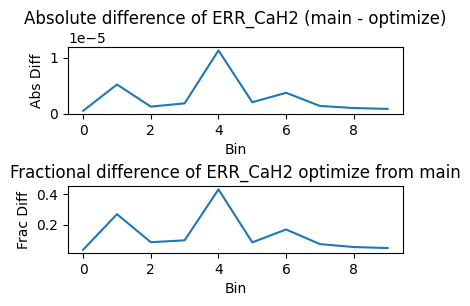


FWHM_FLAG shape (main): (10,)
FWHM_FLAG shape (optimize): (10,)
Max difference (FWHM_FLAG): 0
Min difference (FWHM_FLAG): 0
Mean difference (FWHM_FLAG): 0.0
Stddev difference (FWHM_FLAG): 0.0
FWHM_FLAG is identical!



In [9]:
LS_main = fits.open(results_dir+"/"+main_project+"/"+main_project+"_ls_OrigRes.fits")
LS_optimize = fits.open(results_dir+"/"+optimize_project+"/"+optimize_project+"_ls_OrigRes.fits")
extnames = list(LS_optimize[1].data.dtype.names)

for extname in extnames:
    data_main = LS_main[1].data[extname]
    data_optimize = LS_optimize[1].data[extname]

    # Print the shapes of the two data arrays
    print(f"{extname} shape (main):", data_main.shape)
    print(f"{extname} shape (optimize):", data_optimize.shape)

    # Check if the two data arrays have the same shape
    if data_main.shape != data_optimize.shape:
        print(f"Warning: {extname} has different shapes!")

    # Calculate the difference between the two data arrays
    diff = np.abs(data_main - data_optimize)

    # Print the maximum and minimum differences
    print(f"Max difference ({extname}):", np.nanmax(diff))
    print(f"Min difference ({extname}):", np.nanmin(diff))

    # Print the mean and standard deviation of the differences
    print(f"Mean difference ({extname}):", np.nanmean(diff))
    print(f"Stddev difference ({extname}):", np.nanstd(diff))

    # Check if the two data arrays are identical
    if np.allclose(data_main, data_optimize, equal_nan=True):
        print(f"{extname} is identical!")
        print("")
    else:
        print(f"{extname} is different!")

        # Plot the differences
        fig, axs = plt.subplots(2, figsize=(4, 3))
        axs[0].plot(diff)
        axs[0].set_xlabel("Bin")
        axs[0].set_ylabel("Abs Diff")
        axs[0].set_title(f"Absolute difference of {extname} (main - optimize)")

        # Calculate the fractional error
        fractional_error = diff / np.abs(data_main)
        axs[1].plot(fractional_error)
        axs[1].set_xlabel("Bin")
        axs[1].set_ylabel("Frac Diff")
        axs[1].set_title(f"Fractional difference of {extname} optimize from main")

        plt.tight_layout(pad=0.5)
        plt.show()
        print("")

# Pipeline Spectra Files

In [10]:

binspecf_main = results_dir+"/"+main_project+"/"+main_project+"_ls-cleaned_linear.fits"
spec_main = fits.getdata(binspecf_main)['SPEC']
espec_main = fits.getdata(binspecf_main)['ESPEC']
loglam_main = fits.getdata(binspecf_main, ext=2)['LAM']

binspecf_optimize = results_dir+"/"+optimize_project+"/"+optimize_project+"_ls-cleaned_linear.fits"
spec_optimize = fits.getdata(binspecf_optimize)['SPEC']
espec_optimize = fits.getdata(binspecf_optimize)['ESPEC']
loglam_optimize = fits.getdata(binspecf_optimize, ext=2)['LAM']

spec_main shape: (10, 2939)
spec_optimize shape: (10, 2939)
Max difference: 0.0
Min difference: 0.0
Mean difference: 0.0
Stddev difference: 0.0
Binned spectra are identical!


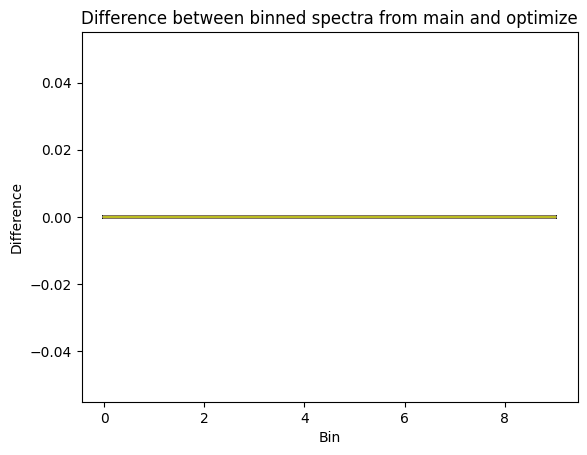

espec_main shape: (10, 2939)
espec_optimize shape: (10, 2939)
Max espec difference: 0.0
Min espec difference: 0.0
espec tables are identical!
loglam_main shape: (2939,)
loglam_optimize shape: (2939,)
Max loglam difference: 0.0
Min loglam difference: 0.0
loglam tables are identical!


In [11]:
# Inspect the shapes and sizes of the two spectra tables
print(f"spec_main shape: {spec_main.shape}")
print(f"spec_optimize shape: {spec_optimize.shape}")

# Check if the two spectra tables have the same shape
if spec_main.shape != spec_optimize.shape:
    print("Warning: spectra have different shapes!")

# Calculate the difference between the two spectra tables
diff = np.abs(spec_main - spec_optimize)

# Print the maximum and minimum differences
print(f"Max difference: {np.max(diff)}")
print(f"Min difference: {np.min(diff)}")

# Print the mean and standard deviation of the differences
print(f"Mean difference: {np.mean(diff)}")
print(f"Stddev difference: {np.std(diff)}")

# Check if the two spectra tables are identical
if np.allclose(spec_main, spec_optimize):
    print("Binned spectra are identical!")
else:
    print("Binned spectra are different!")

# Plot the differences (optional)
plt.plot(diff)
plt.xlabel("Bin")
plt.ylabel("Difference")
plt.title("Difference between binned spectra from main and optimize")
plt.show()

# Check espec and loglam variables too
print(f"espec_main shape: {espec_main.shape}")
print(f"espec_optimize shape: {espec_optimize.shape}")

# Check if the two espec tables have the same shape
if espec_main.shape != espec_optimize.shape:
    print("Warning: espec tables have different shapes!")

# Calculate the difference between the two espec tables
diff_espec = np.abs(espec_main - espec_optimize)

# Print the maximum and minimum differences for espec
print(f"Max espec difference: {np.max(diff_espec)}")
print(f"Min espec difference: {np.min(diff_espec)}")

# Check if the two espec tables are identical
if np.allclose(espec_main, espec_optimize):
    print("espec tables are identical!")
else:
    print("espec tables are different!")

# Check loglam variables too
print(f"loglam_main shape: {loglam_main.shape}")
print(f"loglam_optimize shape: {loglam_optimize.shape}")

# Check if the two loglam tables have the same shape
if loglam_main.shape != loglam_optimize.shape:
    print("Warning: loglam tables have different shapes!")

# Calculate the difference between the two loglam tables
diff_loglam = np.abs(loglam_main - loglam_optimize)

# Print the maximum and minimum differences for loglam
print(f"Max loglam difference: {np.max(diff_loglam)}")
print(f"Min loglam difference: {np.min(diff_loglam)}")

# Check if the two loglam tables are identical
if np.allclose(loglam_main, loglam_optimize):
    print("loglam tables are identical!")
else:
    print("loglam tables are different!")

Mean difference: 0.0
Median difference: 0.0
Standard deviation of difference: 0.0


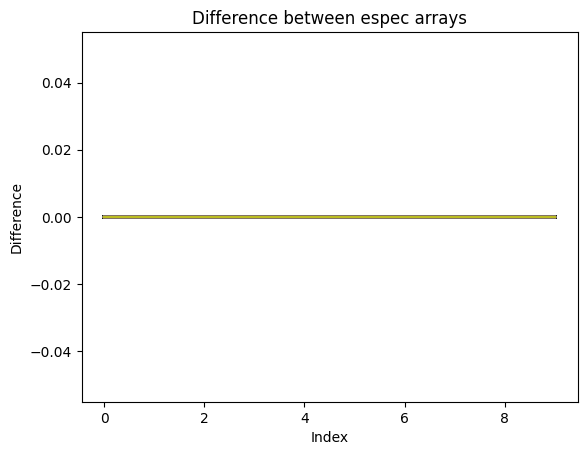

In [12]:
# Calculate the difference between the espec arrays
espec_diff = espec_main - espec_optimize

# Print some statistics about the difference
print("Mean difference:", np.mean(espec_diff))
print("Median difference:", np.median(espec_diff))
print("Standard deviation of difference:", np.std(espec_diff))

# Plot the difference
plt.plot(espec_diff)
plt.xlabel("Index")
plt.ylabel("Difference")
plt.title("Difference between espec arrays")
plt.show()
